Algoritmo de agrupamiento K-means
===

* 30:00 min | Ultima modificación: Abril 14, 2021 | [YouTube]()

Las técnicas de agrupamiento se utilizan para dividir un conjunto de datos en grupos de características homogéneas. Las aplicaciones a nivel organizacional incluyen la detección del tipo de clientes, la obtención de series de comportamiento similar en diferentes tipos de mercados, caracterización de fuerzas de venta, detección del tipo de productos similares, entre muchos otros. En este tutorial se aborda el algoritmo [K-means](https://es.wikipedia.org/wiki/K-medias), el cuál es uno de los más conocidos tanto en el área de estadística como de aprendizaje automático.

## Descripción del problema

Se desea detectar los tipos de clientes existentes en una empresa con el fin de poder definir políticas para su manejo en una etapa posterior.

Se tienen 60 observaciones para las variables $x_1$ y $x_2$ las cuales podrían ser utilizadas para caracterizar los clientes. En términos de los datos, se desea determinar si existen grupos de comportamento homogéneo.

In [1]:
%%writefile data.csv
x1,x2
10.67,14.7
10.87,6.91
13.27,13.92
9.74,13.79
11.95,6.05
14.4,16.58
10.23,14.3
12.77,7.97
14.5,17.39
11.17,15.53
13.25,8.03
14.2,16.7
10.41,15.08
14.42,9.25
14.62,17.22
11.14,14.45
16.03,9.88
13.05,12.2
10.12,12.95
12.23,6.97
14.43,16.31
9.58,13.76
13.24,8.58
13.51,15.12
11.16,15.21
10.88,6.15
14.63,17.0
10.08,13.53
15.85,9.51
15.36,16.95
9.96,13.31
11.63,7.28
14.24,17.55
9.17,12.41
13.41,8.35
13.82,15.46
11.52,16.01
11.71,6.37
14.52,18.9
11.27,15.41
12.49,7.6
15.43,19.0
8.72,11.66
14.46,8.21
14.58,17.01
11.3,15.11
15.0,10.11
12.87,14.26
9.7,13.56
12.24,7.16
15.37,18.91
8.69,11.81
13.68,8.12
15.61,19.0
10.99,16.28
15.06,8.47
15.12,17.84
10.82,14.41
12.78,8.74
13.64,15.49

Writing data.csv


## Definición metamática del problema de agrupameinto

Este es el problema inverso al de clasificación. En la siguiente figura se desea determinar cuántos grupos existen en un conjunto de datos y los centroides de dichos grupos, tal que los miembros de cada grupo tengan unas características similares. El centroide de cada grupo representa a los miembros de su grupo.   

![assets/agrupamiento-1.jpg](assets/agrupamiento-1.jpg)

Nóte que en este ejemplo resulta fácil de visualizar ya que es un problema de dos dimensiones. En la realidad esto es completamente inusual y no hay una forma simple de detectar los grupos visualmente.

## Algoritmo K-means

El algoritmo K-means se basa en asignar $n$ ejemplos a uno de $K$ grupos posibles. La notación usada es la siguiente:


* $\mathbf{x}_i$ representa el punto $i$.


* $x_{ij}$ representa las componentes del punto $\mathbf{x}_i$, con $j=1,...,P$.


* $P$ es el número de dimensiones (cantidad de variables).


* $S_k$ representa el conjunto de patrones del grupo $k$.


* La pertenencia del ejemplo (patrón) $\mathbf{x}_i$ al grupo $S_k$ se representa como $\mathbf{x}_i \in S_k$. 


* $\mathbf{u}_k$ representa el centro del grupo $k$, con componentes $u_{kj}$; $j=1,...,P$ y $k=1,...,K$.


El algoritmo asigna el ejemplo $\mathbf{x}_i$ al grupo al que pertenece el centroide más cercano $\mathbf{u}_k$. Si se tienen tres grupos ($K=3$), cuyos centroides (representados por los rectángulos) son generados aleatoriamente, los puntos serían asignados a cada grupo de la siguiente forma:

![assets/agrupamiento-2.jpg](assets/agrupamiento-2.jpg)

**Actividad.--** Para los siguientes centros de clusters (9.96, 13.31), (13.24, 8.58) y (14.58, 17.01) asigne cada patrón a uno de los clusters (los datos se encuentran en el archivo de Microsoft Excel).

En el algoritmo K-means, se pretende minimizar la distancia entre los miembros de cada grupo y maximizar la distancia entre grupos.  Para ello, en este algoritmo se minimiza:

$$ \sum_{i=1}^k \sum_{\mathbf{x}_j \in S_i} \text{dist}( \mathbf{x}_j, \mathbf{u}_i)$$


Si se usa la norma euclidiana:

$$ \text{dist}( \mathbf{x}_j, \mathbf{u}_i) = \| \mathbf{x}_j - \mathbf{u}_i \|^2 = \sum_{p=1}^P (x_{jp} - u_{ip})^2$$

Este proceso se realiza en dos fases:


* Paso 1: Dados los centros de los clusters $\mathbf{u}_i$, cada punto $\mathbf{x}_j$ se asigna al cluster más cercano. En esta fase se asignan todos los ejemplos de la muestra de datos a un cluster (Ejercicio anterior).


* Paso 2: Se recalcula cada centro $\mathbf{u}_i$ como el promedio de los puntos $\mathbf{x}_j$ que pertenecen a él; es decir, la componente $u_{ip}$ del centroide $i$ es el promedio de las componentes $x_{jp}$. 


El algoritmo se detiene cuando ningún punto cambia de cluster. Este caso es ejemplificado en la siguiente figura.

![assets/agrupamiento-3.jpg](assets/agrupamiento-3.jpg)

**Actividad.---** Compute los nuevos centros de los clusters y asigne nuevamente los ejemplos a los clusters hasta que el algoritmo converja.

## Métricas de distancia

Existen distintas métricas para computar la distancia entre puntos. 

**Euclidiana.** 

$$ \text{dist}(\mathbf{x}_i, \mathbf{x}_j) =\left\{ \sum_k (x_{ik} - x_{jk})^2 \right\}^\frac{1}{2}$$

**Manhattan.**

$$ \text{dist}(\mathbf{x}_i, \mathbf{x}_j) = \sum_k \left|x_{ik} - x_{jk}\right| $$


**Chebychev**.

$$ \text{dist}(\mathbf{x}_i, \mathbf{x}_j) = \max_k \left|x_{ik} - x_{jk}\right| $$




## Agrupamiento usando KMeans en Python

In [2]:
import pandas as pd

df = pd.read_csv(
    "data.csv",
    sep=",",         # separador de campos
    thousands=None,  # separador de miles para números
    decimal=".",     # separador de los decimales para números
)

In [3]:
from sklearn.cluster import KMeans

# Crea el clasificador
m = KMeans(n_clusters=3)

# Construye los clusters
m.fit(df.values)

# Pronostica los clusters para la muestra de datos
p = m.predict(df.values)
p

array([0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2], dtype=int32)

In [4]:
#
# Número de elementos por cluster
#
(pd.DataFrame(p))[0].value_counts()

0    23
1    20
2    17
Name: 0, dtype: int64

In [5]:
#
# Centros de los clusters
#
m.cluster_centers_

array([[10.67956522, 14.07173913],
       [13.1975    ,  7.9855    ],
       [14.58705882, 17.20176471]])

In [6]:
#
# Promedio de x1 y x2 por cluster
#
df["cluster"] = p
df.groupby("cluster").mean()

x1         x2
cluster                      
0        10.679565  14.071739
1        13.197500   7.985500
2        14.587059  17.201765

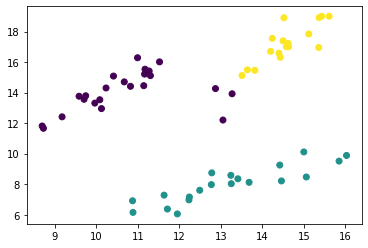

In [7]:
#
# Gráfico de los clusters
#
import matplotlib.pyplot as plt

plt.scatter(df.values[:, 0], df.values[:, 1], c=p);

## Escalamiento y transformación de variables

El algoritmo K-means se ve afectado por la escala de las variables. Por ello, se debe realizar la transformación de las variables antes de aplicar K-means. En las siguientes ecuaciones, $x$ representa cualquiera de las componentes de $\mathbf{x}$.

**Normalización max-min.** 

$$x_* = \frac{x-\min(x)}{\max(x) - \min(x)}$$

**Estandarización z-score.**

$$z_* = \frac{x-\mu_x}{\sigma_x}$$

* $\mu_x$ es la media de $x$.
* $\sigma_x$ es la desviación estándar de $x$.

**Variables nominales.** Una variable nominal con categorías $C_1$, $C_2$, ..., $C_n$ se codifica con $n-1$ niveles, $L_i$, $i=1,...,n-1$:

$$ L_i =
   \begin{cases}
      1, & \text{if $\mathbf{x} \in C_i$.} \\
      0, &\text{En caso contrario.}
   \end{cases}
$$


Si las categorías están ordenadas se codifica como:

$$ L_i =
   \begin{cases}
      i, & \text{if $\mathbf{x} \in C_i$.} \\
      0, &\text{En caso contrario.}
   \end{cases}
$$

y luego es realiza la normalización.

## Otras técnicas de agrupamiento

### Clustering Jerárquico Divisivo

El algoritmo se inicia con un solo cluster que contiene todos los datos. Cada cluster es dividido recursivamente en dos clusters de máxima disimilitud. El algoritmo finaliza cuando hay un cluster por cada observación.

### Clustering Jerárquico Aglomerativo

En esta algoritmo, cada cluster contiene un solo dato. 

1. Se calcula la métrica de distancia entre todos los clusters.

2. Se unen los dos clusters con menor distancia en uno solo.

3. Se retorna al paso 1.

El algoritmo se detiene cuando se llegue a un solo cluster que contiene todos los datos.

### Bisecting K-means

Este es un procedimiento constructivo a medias entre el agrupamiento jerárquico y K-means. El algoritmo se inicia con un solo cluster que contiene todos los datos y se ejecuta de la siguiente forma:

1. Se selecciona un cluster para dividir.

2. Se divide el cluster seleccionado en dos clusters usando K-means. Este es el paso de bisección.

3. Repita el paso 2 por un número fijo de veces y seleccione la partición con la mejor métrica de desempeño.

4. Repita los pasos 1, 2 y 3 hasta alcanzar el número deseado de clusters.



**Actividad.---** Para el conjunto de datos que aparece al final de este tutorial, aplique este método hasta obtener 3 clusters.

### K-medoids

En esta variación del algoritmo, los centros (medoids) de cada cluster son puntos de la muestra de datos; esto es, el centro de cada cluster es uno de los puntos asignados al cluster. El algoritmo opera de forma similar a K-means:

* Paso 1: Se seleccionan $k$ puntos como centros de los clusters.

* Paso 2: Para todos los clusters se verifica si alguno de los miembros del cluster disminuye la métrica de distancia utilizada. En caso afirmativo, este punto pasa a ser el nuevo centro del cluster. En caso negativo, hay convergencia del algoritmo.

* Paso 3: Se asignan los puntos al cluster con centro más cercano y se retorna al Paso 2. 

**Actividad.---** Para el conjunto de datos que aparece al final de este tutorial, use los puntos 1, 21 y 41 como medoids. Asigne los puntos restantes a cada uno de los clusters y determine cuál punto debe ser el siguiente medoid para cada cluster.

### K-means++

Este algoritmo es similar al algoritmo K-means, con la diferencia que los nuevos centros de los clusters son generados de forma aleatoria.

### Mini batch K-means

Este método se basa en tomar un subconjunto de los datos disponibles para estimar los clusters. Se usa para grandes conjuntos de datos.

Para un número $T$ de iteraciones y unos centros iniciales aleatorios se realiza el siguiente procedimiento:

1. Se seleccionan $b$ puntos aleatoriamente del conjunto de datos.

2. Se asignan los puntos a los clusters actuales como en K-means.

3. Por cada uno de los $b$ puntos se ajusta el centro del correspondiente cluster uno a uno.

Este algoritmo usa una regla de ajuste similar a la regla de aprendizaje del perceptrón.

### Canopy Clustering

Es un método para crear grupos de elementos cercanos y se puede usar como una fase preliminar antes de usar otros métodos como k-means. El método requiere definir dos distancias `T1` y `T2`. El método funciona como se indica a continuación:

* Se colocan todos los puntos en el conjunto $S$.


* Mientras $S$ no este vacio:
    
  * Seleccione aleatoriamente un punto $\mathbf{r}$ del conjunto $S$ y remuevalo. Este el centro de un nuevo canopy.
    
  * Para cada punto $\mathbf{x}$ en $S$ compute la distancia $d$ entre $\mathbf{x}$ y $\mathbf{r}$.
    
  * Si $d$ < `T1`,  agregue el punto $\mathbf{x}$ al canopy con centro en $\mathbf{r}$.
    
  * Si $d$ < `T2`,  remueva $\mathbf{x}$ de $S$.
    
    
Note que un punto podría pertenecer a más de un canopy. Para el ejemplo desarrollado, cada canopy es representado por un circulo.        

![assets/agrupamiento-4.jpg](assets/agrupamiento-4.jpg)

**Actividad.---** Para el conjunto de datos que aparece al final de este tutorial:

* Use el punto No. 1 como centro del primer canopy y determine cuales puntos deben ser asignados a este canopy.

* Use el punto No. 21 como centro del segundo canopy y determine cuales puntos deben ser asignados a este canopy.

usando `T1` = 0.18 y `T2`= 0.22.

### Fuzzy Clustering

Mientras que en el caso tradicional un punto pertence o no a un cluster, en el agrupamiento difuso se permite la pertenencia parcial. Esto implica, que un punto podría pertenecer simultaneamente a varios cluster. El nivel de pertenencia se mide mediante un número real en el intevalo [0, 1], donde el cero indica la absoluta certeza de que el punto no pertence al cluster; y donde el uno indica la absoluta certeza de que el punto si pertenece al cluster.

El algoritmo requere que se definan los siguientes parámetros para us uso:


* $K$: la cantidad de clusters.


* $m$: un valor entero, donde 1 genera una partición con una pertenencia (prácticamente) exclusiva de cada punto a un cluster; y $m$ > 30, genera valores de pertenencia cercanos a 1 / $K$.


* $d^2_{ij}$: la métrica de distancia entre los puntos $i$ y $j$


* $u_k, k = 1,...,K$: centros de los clusters, generados de forma aleatoria al inicio del algoritmo. 


* $w_{ik}$: es la pertenencia del punto $i$ al cluster $k$.

El algoritmo es el siguiente:


* Se computa la matriz de pertenencia difusa, donde $w_{ij}$ representa la pertenencia del punto $i$ al cluster $j$.

$$w_{ik} = \left\{
\sum_{k=1}^K \left(
\frac{\|\mathbf{x}_i - \mathbf{u}_j\|}{|\mathbf{x}_i - \mathbf{u}_k\|}
\right) ^\frac{2}{m-1}
\right\}^{-1}
$$


* Se computan los nuevos centros como:

$$\mathbf{u}_{k} = \frac{\sum_i (w_{ik})^m \; \mathbf{x}_k}{\sum_i (w_{ik})^m} $$


El algoritmo se detiene cuando se alcanza un máximo de iteraciones o los valores de $w_{ij}$ cambian muy poco de una interacción a la siguiente.

**Actividad.---** Para los siguientes centros de clusters (9.96, 13.31), (13.24, 8.58) y (14.58, 17.01) asigne cada patrón a uno de los clusters y compute los siguientes centros usando fuzzy K-means, con $m=1.2$.

### Spectal K-means

En este caso se aplica el algoritmo K-means a los vectores y valores propios de la matriz de similitud de los datos. El algoritmo procede como se indica a continuación:


* Se calcula la matriz de distancias entre los puntos; $A_{ij} = A_{ji}$ representa la distancia entre los puntos $\mathbf{x}_i$ y $\mathbf{x}_j$.


* Se computa el Laplaciano $\mathbf{L}$ de la matriz $A$.


* Se calculan los primeros $K$ vectores y valores propios de $\mathbf{L}$.


* Los $K$ vectores propios son usandos en el algoritmo K-means.



---

In [8]:
!rm data.csv